In [ ]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

# 주어진 온도 beta에 대해 스웬덴-왕 알고리즘에서 flip이 일어날 확률을 계산하는 함수
def flip_probability(beta):
    return 1-np.exp(-2*beta)

# site가 속한 클러스터의 root를 찾는 함수
def find_root(site, parents):
    if parents[site] < 0:
        return site
    parents[site] = find_root(parents[site], parents)
    return parents[site]

# 두 개의 클러스터를 합치는 함수
def union_clusters(root1, root2, parents):
    if root1 != root2:
        if parents[root1] > parents[root2]:
            parents[root2] += parents[root1]
            parents[root1] = root2
            return root2
        else:
            parents[root1] += parents[root2]
            parents[root2] = root1
            return root1
    return root1

# 클러스터를 flip하는 함수
def cluster_flip(spins, L, beta):
    N = L*L
    parents = np.ones(N, dtype=int)*-1  # 각 노드의 부모를 나타내는 배열
    bonds = []

    # 모든 가능한 bond 추가
    for i in range(L):
        for j in range(L):
            current = i*L+j
            right = i*L+(j+1)%L
            down = ((i+1)%L)*L+j
            bonds.append((current, right))
            bonds.append((current, down))

    # bond을 flip할지 여부 결정
    for site1, site2 in bonds:
        if spins[site1] == spins[site2] and flip_probability(beta) > rd.random():
            root1 = find_root(site1, parents)
            root2 = find_root(site2, parents)
            union_clusters(root1, root2, parents)

    # 모든 클러스터를 50% 확률로 flip
    clusters = {find_root(site, parents) for site in range(N)}
    for cluster in clusters:
        if rd.random() < 0.5:
            for site in range(N):
                if find_root(site, parents) == cluster:
                    spins[site] *= -1

    return spins

# Swendsen_wang 알고리즘을 사용하여 주어진 격자 크기에 대해 평균 자화율을 계산하는 함수
def Swendsen_wang(L, beta_values = np.linspace(0, 1, 11)):
    final_m_list = []

    for beta in beta_values:
        m_list = []
        spins = np.random.choice([-1, 1], size=(L*L))

        # 1000번의 클러스터 flip을 통해 자화율 계산
        for _ in range(1000):
            spins = cluster_flip(spins, L, beta)
            m = np.mean(spins)
            m_list.append(abs(m))
        final_m_list.append(np.mean(m_list))

    return beta_values, final_m_list

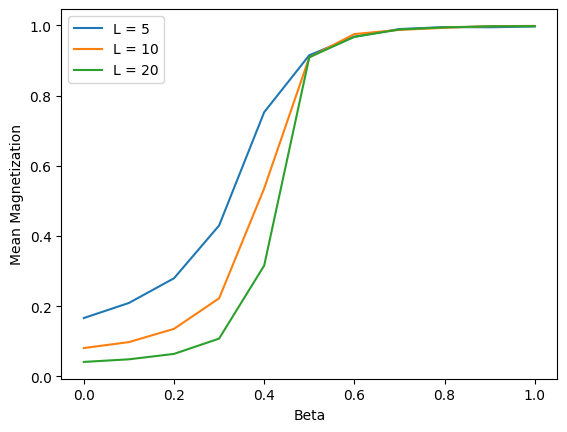

In [ ]:
# 주어진 격자 크기 리스트
L_list = [5, 10, 20]

# 각 격자 크기에 대해 Swendsen_wang 알고리즘을 수행하고 결과를 그래프로 표시
for i in L_list:
    beta_values, m_list = Swendsen_wang(i)
    plt.plot(beta_values, m_list, label=f'L = {i}')

plt.xlabel('Beta')
plt.ylabel('Mean Magnetization')
plt.legend()
plt.show()